---

## Quick Recap: RNN and Its Problem

### ANN (Artificial Neural Network)

```
Simple architecture:

    Input Layer → Hidden Layer(s) → Output Layer
         ↓              ↓              ↓
       [x₁]          [h₁]           [y]
       [x₂]    →     [h₂]     →     
       [x₃]          [h₃]           
         
    Fully connected, no memory of sequence
```

**Problem**: ANN cannot handle **sequential data** where order matters!

### Example: Sentiment Analysis

```
Text: "Hey my name is Nitish"

ANN approach:
- Convert entire sentence to vector
- Feed all at once
- Order is LOST! "Nitish is name my Hey" would be same!
```

### RNN Solution: Add State/Memory

```
RNN processes word by word, maintaining state:

"Hey" → [RNN] → h₁ →
                     ↘
"my"  → [RNN] → h₂ → (uses h₁)
                     ↘
"name" → [RNN] → h₃ → (uses h₂)
                     ↘
"is"   → [RNN] → h₄ → (uses h₃)
                     ↘
"Nitish" → [RNN] → h₅ → Output
```

RNN introduces **recurrent connection** - state from previous step feeds into current step.

---

## The Problem with Simple RNN

### When Sequence is Long...

RNN works fine for **short sequences**, but fails with **long sequences**.

### Example: Fill in the Blank

**Short sequence** (RNN can handle):
```
"Maharashtra is a state. The language spoken there is ____"
                                                      ↑
                                              Answer: Marathi
```

**Long sequence** (RNN struggles):
```
"Maharashtra is a beautiful state. It has got 25 cities.
 It has beautiful vegetation and forests. Mumbai is there.
 The weather is nice. People are friendly. The food is great.
 ... (50 more sentences) ...
 The language spoken there is ____"
                              ↑
                      Answer: Marathi (but RNN forgot Maharashtra!)
```

### Why Does RNN Fail?

**Vanishing/Exploding Gradient Problem** (covered in Lecture 60)

```
"Maharashtra" ... (50 words) ... "language is ____"
      ↑                                  ↑
  Important!                     Need to predict
  (but forgotten)                  "Marathi"
      
      └────────── TOO FAR APART! ──────────┘
```

RNN is like a person with **short-term memory loss** (like Aamir Khan in Ghajini!) - forgets important old information!

---

## The Core Idea Behind LSTM

### Understanding Through a Story

Let me tell you a story, and YOUR job is to decide: **Is it a good story or bad story?**

---

#### The Story of Pratapgarh

```
🏰 Once upon a time, there was a state in India called PRATAPGARH.

👑 There was a king named VIKRAM.
   - Vikram was very powerful
   - Very kind to his people
   - A very good king!

⚔️ One day, a neighboring king XERXES attacked Pratapgarh.
   - Terrible war happened
   - Vikram fought bravely
   - But... Vikram DIED in battle 💀

👑 Everyone was sad. But then came VIKRAM JUNIOR (Vikram's son).
   - Even more powerful than his father!
   - 1.5x all of Vikram's qualities
   - Wanted revenge against Xerxes

⚔️ When Vikram Junior turned 20, he attacked Xerxes.
   - Another terrible war
   - But... Vikram Junior also DIED 💀

👑 Then came VIKRAM SUPER JUNIOR (grandson).
   - Not as strong as father or grandfather
   - But VERY SMART (out-of-the-box thinking)
   - At age 15, attacked Xerxes

⚔️ Xerxes dominated the battle initially...
   - But Vikram Super Junior used his BRAIN
   - And finally KILLED XERXES! 🎉
   - Avenged his father and grandfather!

THE END
```

---

**Question**: Is this a GOOD story or BAD story?

Think about HOW you decided...

---

## How Your Brain Processed the Story

### The Key Insight

When processing the story, your brain did something special:

```
┌─────────────────────────────────────────────────────────────────┐
│                     YOUR BRAIN                                   │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   SHORT-TERM CONTEXT          LONG-TERM CONTEXT                 │
│   (What's happening now)      (Important things to remember)    │
│                                                                  │
│   ┌─────────────────┐         ┌─────────────────┐               │
│   │ Current scene   │    ←→   │ Key characters  │               │
│   │ Current action  │         │ Key events      │               │
│   │ Recent dialogue │         │ Important facts │               │
│   └─────────────────┘         └─────────────────┘               │
│                                                                  │
│   Communication between short-term and long-term!               │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```

### Step-by-Step Processing

**Step 1**: "1000 years old story, Pratapgarh"
```
Short-term: "Old story, Pratapgarh"
Brain thinks: "1000 years → swords not guns, historical setting"
              "Pratapgarh → geography matters"
→ ADD to Long-term: [1000 years, Pratapgarh]
```

**Step 2**: "King Vikram - powerful, kind, good king"
```
Short-term: "Vikram is hero material"
Brain thinks: "Main character! Must remember!"
→ ADD to Long-term: [1000 years, Pratapgarh, VIKRAM]
```

**Step 3**: "Xerxes attacks, war, Vikram DIES"
```
Short-term: "Vikram died!"
Brain thinks: "Vikram is NOT the hero anymore!"
→ REMOVE from Long-term: Vikram
→ Long-term now: [1000 years, Pratapgarh, Xerxes (villain)]
```

**Step 4**: "Vikram Junior - 1.5x powerful, wants revenge"
```
Short-term: "New hero candidate"
Brain thinks: "Maybe HE is the hero!"
→ ADD to Long-term: [1000 years, Pratapgarh, Xerxes, VIKRAM JUNIOR]
```

**Step 5**: "Vikram Junior also DIES"
```
Short-term: "Another death!"
Brain thinks: "Nope, he's not the hero either"
→ REMOVE from Long-term: Vikram Junior
→ Long-term now: [1000 years, Pratapgarh, Xerxes]
```

**Step 6**: "Vikram Super Junior - smart, kills Xerxes"
```
Short-term: "Smart kid wins!"
Brain thinks: "THIS is the hero! Happy ending!"
→ ADD to Long-term: [Vikram Super Junior = HERO]
```

**Final Decision**: Use long-term memory to decide
```
Long-term contains: Hero won, villain defeated, revenge achieved
→ OUTPUT: GOOD STORY! ✓
```

---

## The Problem with RNN's Memory

### RNN Has Only ONE Memory Path

```
RNN Architecture:

    Input → [RNN Cell] → Output
               ↑↓
         ┌─────────────┐
         │   SINGLE    │
         │   STATE     │  ← Only ONE path for memory!
         │   (h_t)     │
         └─────────────┘
```

This single state must handle:
- ✗ Short-term context
- ✗ Long-term context
- **TOO MUCH PRESSURE on one path!**

### Result: Short-Term Dominates!

```
Mathematically (vanishing gradient):

After many time steps, this single path:
- Loses information about old inputs
- Only retains recent information
- Like a person with short-term memory loss!
```

### The LSTM Solution

**Add a SECOND path specifically for long-term memory!**

```
LSTM Architecture:

         ┌─────────────────────────────────┐
         │     LONG-TERM MEMORY            │  ← NEW! Dedicated path
         │     (Cell State - C_t)          │
         └─────────────────────────────────┘
                        ↑↓
    Input → [LSTM Cell] → Output
                ↑↓
         ┌─────────────────────────────────┐
         │     SHORT-TERM MEMORY           │  ← Same as RNN
         │     (Hidden State - h_t)        │
         └─────────────────────────────────┘
```

**TWO separate paths** = Better memory management!

---

## Visualizing RNN vs LSTM

### RNN Architecture (Simple)

```
                    x_t (input)
                       ↓
    h_{t-1} ────→ [  RNN Cell  ] ────→ h_t
       ↑          (simple tanh)         │
       │                                │
       └────────────────────────────────┘
                 (recurrent connection)
                 
    Only ONE state flowing through!
```

### LSTM Architecture (Two Paths)

```
    C_{t-1} ─────────────────────────────────────→ C_t
       │         (LONG-TERM MEMORY PATH)            │
       │                   ↑↓                       │
       │              ┌─────────┐                   │
       │              │  LSTM   │                   │
       │              │  CELL   │                   │
       │              │(complex)│                   │
       │              └─────────┘                   │
       │                   ↑↓                       │
    h_{t-1} ─────────────────────────────────────→ h_t
                 (SHORT-TERM MEMORY PATH)
                          ↑
                         x_t
                       (input)
                       
    TWO states flowing through!
```

---

## The LSTM Cell: What's Inside?

### The Complex Architecture

Here's where it gets interesting (and complex):

```
┌────────────────────────────────────────────────────────────────┐
│                        LSTM CELL                                │
│                                                                 │
│   C_{t-1} ──────[×]────────[+]────────────────────→ C_t        │
│                  ↑          ↑                                   │
│                  │          │                                   │
│              ┌───┴───┐  ┌───┴───┐                               │
│              │FORGET │  │ INPUT │                               │
│              │ GATE  │  │ GATE  │                               │
│              └───────┘  └───────┘                               │
│                  ↑          ↑                                   │
│                  │          │                                   │
│   h_{t-1} ───────┴──────────┴────────[OUTPUT]──────→ h_t       │
│                  ↑                    [ GATE ]                  │
│                  │                       ↑                      │
│                 x_t ─────────────────────┘                      │
│                                                                 │
└────────────────────────────────────────────────────────────────┘
```

### Three Gates in LSTM

| Gate | Symbol | Purpose |
|------|--------|----------|
| **Forget Gate** | f_t | What to REMOVE from long-term memory |
| **Input Gate** | i_t | What to ADD to long-term memory |
| **Output Gate** | o_t | What to OUTPUT based on current state |

These gates enable **communication** between short-term and long-term memory!

---

## Understanding the Three Gates

### 1. Forget Gate 🗑️

**Purpose**: Decide what to **REMOVE** from long-term memory

```
Based on:
- Current input (x_t)
- Previous short-term memory (h_{t-1})

Decides:
- What's no longer relevant in long-term memory?
- Remove it!
```

**Story Example**:
```
Long-term memory had: [Pratapgarh, 1000 years, VIKRAM]
Current input: "Vikram died in battle"

Forget Gate decides: "Vikram is no longer the hero"
→ REMOVE Vikram from long-term memory
```

### 2. Input Gate ➕

**Purpose**: Decide what to **ADD** to long-term memory

```
Based on:
- Current input (x_t)
- Previous short-term memory (h_{t-1})

Decides:
- What new information is important?
- Add it to long-term memory!
```

**Story Example**:
```
Current input: "Vikram Junior is 1.5x powerful"

Input Gate decides: "New hero candidate!"
→ ADD Vikram Junior to long-term memory
```

### 3. Output Gate 📤

**Purpose**: Decide what to **OUTPUT** (and create new short-term memory)

```
Based on:
- Current input (x_t)
- Updated long-term memory (C_t)

Decides:
- What should be the output?
- What should be the new short-term memory?
```

**Story Example**:
```
At the END of story:
Long-term memory: [Hero won, villain defeated]
Current input: "The End"

Output Gate decides: Based on long-term memory...
→ OUTPUT: "Good Story!" ✓
```

---

## Another Example: Pronoun Resolution

### The Task

```
Sentence 1: "Ankit is a great girl."
Sentence 2: "____ was the state topper."

Fill in the blank: She or He?
```

### How LSTM Processes This

**Step 1**: Process "Ankit is a great girl"
```
Input Gate identifies:
- "Ankit" → Important (subject)
- "girl" → Important (gender info)

→ ADD to Long-term: [Ankit, girl]
```

**Step 2**: Process "____ was the state topper"
```
Need pronoun. Check long-term memory:
- Subject: Ankit
- Gender: girl

Output Gate decides:
→ OUTPUT: "She" ✓
```

### What If Context Changes?

```
Sentence 1: "Ankit is a great girl."
Sentence 2: "Nitish is a YouTuber."
Sentence 3: "____ has made several videos on data science."

Fill in the blank: She or He?
```

**Step 2**: Process "Nitish is a YouTuber"
```
Forget Gate: "Ankit" no longer relevant (new subject)
→ REMOVE from Long-term: Ankit, girl

Input Gate: "Nitish" is new subject
→ ADD to Long-term: [Nitish, male (implied)]
```

**Step 3**: Need pronoun
```
Check long-term memory:
- Subject: Nitish
- Gender: male

Output Gate decides:
→ OUTPUT: "He" ✓
```

---

## LSTM as a Computer

### Simple Analogy

Think of LSTM like a **computer**:

```
┌─────────────────────────────────────────────────────────────────┐
│                         LSTM as Computer                         │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│    INPUTS                  PROCESSING              OUTPUTS      │
│    ──────                  ──────────              ───────      │
│                                                                  │
│  ┌──────────┐          ┌──────────────┐        ┌──────────┐    │
│  │ C_{t-1}  │          │              │        │   C_t    │    │
│  │(Long-term│    →     │   UPDATE     │   →    │(New long-│    │
│  │ memory)  │          │   LONG-TERM  │        │  term)   │    │
│  └──────────┘          │   MEMORY     │        └──────────┘    │
│                        │              │                         │
│  ┌──────────┐          │   CREATE     │        ┌──────────┐    │
│  │ h_{t-1}  │    →     │   SHORT-TERM │   →    │   h_t    │    │
│  │(Short-   │          │   MEMORY     │        │(New short│    │
│  │ term)    │          │              │        │  -term)  │    │
│  └──────────┘          └──────────────┘        └──────────┘    │
│                               ↑                                 │
│  ┌──────────┐                 │                                 │
│  │   x_t    │─────────────────┘                                 │
│  │(Current  │                                                   │
│  │ input)   │                                                   │
│  └──────────┘                                                   │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```

### Input/Output Summary

**3 Inputs** (at time t):
1. `C_{t-1}` - Previous long-term memory (Cell State)
2. `h_{t-1}` - Previous short-term memory (Hidden State)
3. `x_t` - Current input

**2 Outputs** (for time t+1):
1. `C_t` - Updated long-term memory
2. `h_t` - New short-term memory (also used as output)

**2 Internal Operations**:
1. **Update** long-term memory (using Forget + Input gates)
2. **Create** new short-term memory (using Output gate)

---

## Visual Comparison: RNN vs LSTM

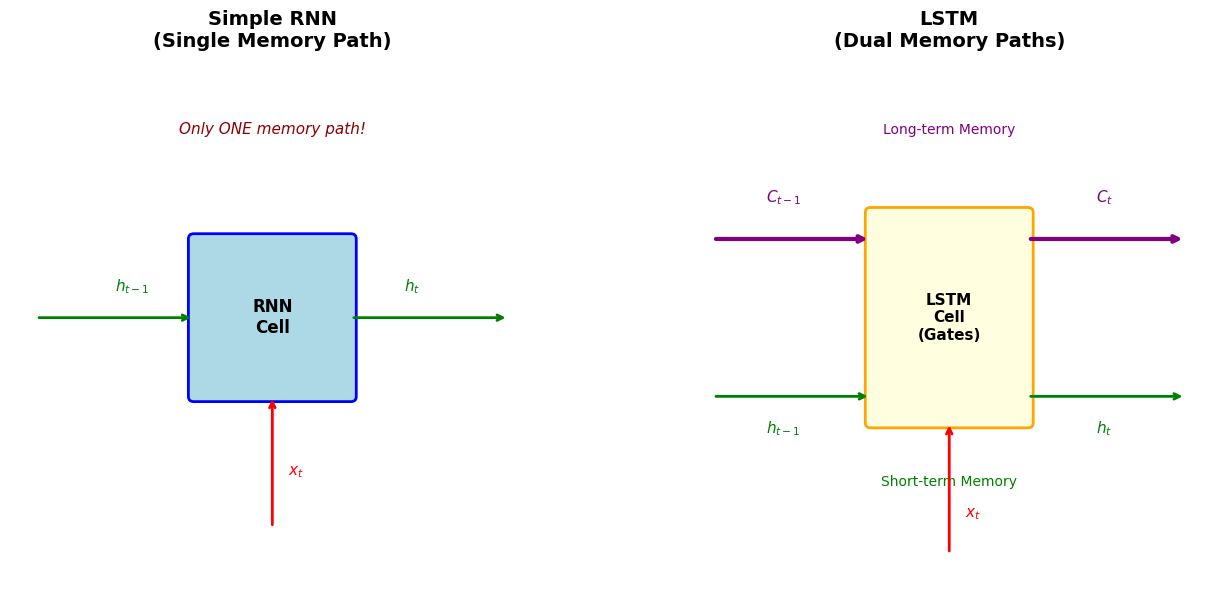

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RNN Diagram
ax1 = axes[0]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Simple RNN\n(Single Memory Path)', fontsize=14, fontweight='bold')

# RNN Cell
rnn_cell = FancyBboxPatch((3.5, 3.5), 3, 3, boxstyle="round,pad=0.1", 
                          facecolor='lightblue', edgecolor='blue', linewidth=2)
ax1.add_patch(rnn_cell)
ax1.text(5, 5, 'RNN\nCell', ha='center', va='center', fontsize=12, fontweight='bold')

# State line (single)
ax1.annotate('', xy=(3.5, 5), xytext=(0.5, 5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax1.annotate('', xy=(9.5, 5), xytext=(6.5, 5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax1.text(2, 5.5, '$h_{t-1}$', fontsize=11, color='green')
ax1.text(7.5, 5.5, '$h_t$', fontsize=11, color='green')

# Input
ax1.annotate('', xy=(5, 3.5), xytext=(5, 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.text(5.3, 2, '$x_t$', fontsize=11, color='red')

# Single memory label
ax1.text(5, 8.5, 'Only ONE memory path!', ha='center', fontsize=11, 
         style='italic', color='darkred')

# LSTM Diagram
ax2 = axes[1]
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('LSTM\n(Dual Memory Paths)', fontsize=14, fontweight='bold')

# LSTM Cell
lstm_cell = FancyBboxPatch((3.5, 3), 3, 4, boxstyle="round,pad=0.1", 
                           facecolor='lightyellow', edgecolor='orange', linewidth=2)
ax2.add_patch(lstm_cell)
ax2.text(5, 5, 'LSTM\nCell\n(Gates)', ha='center', va='center', fontsize=11, fontweight='bold')

# Long-term memory (top)
ax2.annotate('', xy=(3.5, 6.5), xytext=(0.5, 6.5),
            arrowprops=dict(arrowstyle='->', color='purple', lw=3))
ax2.annotate('', xy=(9.5, 6.5), xytext=(6.5, 6.5),
            arrowprops=dict(arrowstyle='->', color='purple', lw=3))
ax2.text(1.5, 7.2, '$C_{t-1}$', fontsize=11, color='purple', fontweight='bold')
ax2.text(7.8, 7.2, '$C_t$', fontsize=11, color='purple', fontweight='bold')
ax2.text(5, 8.5, 'Long-term Memory', ha='center', fontsize=10, color='purple')

# Short-term memory (bottom)
ax2.annotate('', xy=(3.5, 3.5), xytext=(0.5, 3.5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax2.annotate('', xy=(9.5, 3.5), xytext=(6.5, 3.5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax2.text(1.5, 2.8, '$h_{t-1}$', fontsize=11, color='green')
ax2.text(7.8, 2.8, '$h_t$', fontsize=11, color='green')
ax2.text(5, 1.8, 'Short-term Memory', ha='center', fontsize=10, color='green')

# Input
ax2.annotate('', xy=(5, 3), xytext=(5, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax2.text(5.3, 1.2, '$x_t$', fontsize=11, color='red')

plt.tight_layout()
plt.show()

---

## Key Differences: RNN vs LSTM

| Aspect | Simple RNN | LSTM |
|--------|------------|------|
| **Memory Paths** | 1 (hidden state only) | 2 (cell state + hidden state) |
| **Long-term Memory** | ✗ Struggles | ✓ Dedicated path (Cell State) |
| **Short-term Memory** | ✓ Hidden state | ✓ Hidden state |
| **Gates** | None | 3 (Forget, Input, Output) |
| **Architecture** | Simple | Complex |
| **Sequence Length** | Short only | Short AND Long |
| **Vanishing Gradient** | Major problem | Mostly solved |

### The Key Insight

```
RNN:  One path tries to do everything → Fails at long-term

LSTM: Two paths with communication:
      - Long-term path (Cell State) → Highway for important info
      - Short-term path (Hidden State) → Recent context
      - Gates → Control what to remember/forget/output
```

---

## Summary: The "What" of LSTM

### Core Problem
```
RNN has only ONE memory path → Can't handle long sequences
```

### LSTM Solution
```
Add a SECOND memory path (Cell State) dedicated to long-term memory
```

### How It Works (Simplified)
```
1. Cell State (C_t): Long-term memory highway
   - Information can flow unchanged for many steps
   - Controlled additions and removals

2. Hidden State (h_t): Short-term memory
   - Recent context
   - Used for output

3. Three Gates: Communication between paths
   - Forget Gate: What to remove from long-term
   - Input Gate: What to add to long-term
   - Output Gate: What to output
```

### Input/Output
```
INPUTS:                          OUTPUTS:
- C_{t-1} (prev long-term)  →    - C_t (new long-term)
- h_{t-1} (prev short-term) →    - h_t (new short-term + output)
- x_t (current input)
```

### Internal Operations
```
1. UPDATE long-term memory (forget old + add new)
2. CREATE short-term memory (for next step and output)
```

---

## Next Lecture: The "How" of LSTM

In the next lecture, we'll dive into:

1. **Detailed Architecture**: Complete diagram with all operations
2. **Mathematics of Each Gate**:
   - Forget Gate equations
   - Input Gate equations
   - Output Gate equations
3. **Step-by-Step Computation**: How data flows through LSTM
4. **All the Symbols**: σ, tanh, ×, + operations

Stay tuned!